In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import numpy as np

In [2]:
#######################################
#1 READ 'wholesale_customers_data.csv'
#######################################
# Reading 'wholesale_customers_data.csv' into DataFrame 'df'
df = pd.read_csv("/home/abeid/Documents/2-pm-asds/04-intro-to-data-science-with-python/assignment-2/wholesale_customers_data.csv")

# df shape
df.shape

# O Wholesale customers dataset has 440 rows of data across 8 variables.

(440, 8)

In [3]:
# Append rows into DataFrame 'df'
###################################

# creating list of data series
datarowsSeries = [pd.Series([1, 3, 39228, 1431, 764, 4510,93,2346], index=df.columns),
                 pd.Series([1, 3, 14531, 1548, 343,437,841, 1800], index=df.columns),
                 pd.Series([1, 3, 1016, 2016, 2016, 1016, 716, 2116], index=df.columns),
                 pd.Series([1, 3, 1036, 2026, 2066, 1046, 1716, 2516], index=df.columns),
                 pd.Series([1, 3, 1056, 2036, 2066, 1066, 2716, 2716], index=df.columns),
                 pd.Series([1, 3, 1076, 2046, 2066, 1086, 3716, 2916], index=df.columns)]

# appending list of data series with 'df' and assigning it to DataFrame 'df_new' 
df_new =  df.append(datarowsSeries, ignore_index=True)

df_new.shape

(446, 8)

In [4]:
#1.i ILLUSTRATE SUMMARY STATISTICS
##################################
# Channel and Region are categorical variables.
# The rest of the 6 variables are ratio.

# creating DataFrame with categorical variables 'df_newcat'
df_newcat = df_new.drop(["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"], axis=1)

# creating DataFrame with numeric variables 'df_newnum' by dropping categorical variables from 'df_new'
df_newnum = df_new.drop(["Channel", "Region"], axis=1)

#####Descriptive Statistics for Numeric Variables#####
df_newnum.describe()

# O Annual customer spending is highest on Fresh products followed by Milk and Groceries on average
# O On average customers spend the least on Delicassen products 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,446.000000,446.000000,446.00000,446.00000,446.000000,446.000000
mean,11968.775785,5743.183857,7865.20852,3051.14574,2864.697309,1536.665919
std,12671.077458,7344.626047,9468.04341,4827.68344,4740.010059,2803.184225
min,3.000000,55.000000,3.00000,25.00000,3.000000,3.000000
25%,3089.500000,1537.500000,2115.00000,744.00000,258.500000,411.250000
50%,8413.500000,3607.500000,4725.00000,1498.00000,820.500000,982.500000
75%,16905.500000,7141.000000,10510.25000,3543.50000,3888.500000,1836.250000
max,112151.000000,73498.000000,92780.00000,60869.00000,40827.000000,47943.000000


In [5]:
#####Summary Measures for Categorical Variables#####

# mode of categorical variables in 'mode_cat'
mode_cat = df_newcat.mode()

#renaming row label of 'mode_cat' DataFrame
mode_cat.rename(index={0:'mode'}, inplace=True)

mode_cat

# O Most frequent customers are Hotel/Resaurant/Cafe.
# O Highest number of customers are from 'Other' region.

,Channel,Region
mode,1,3


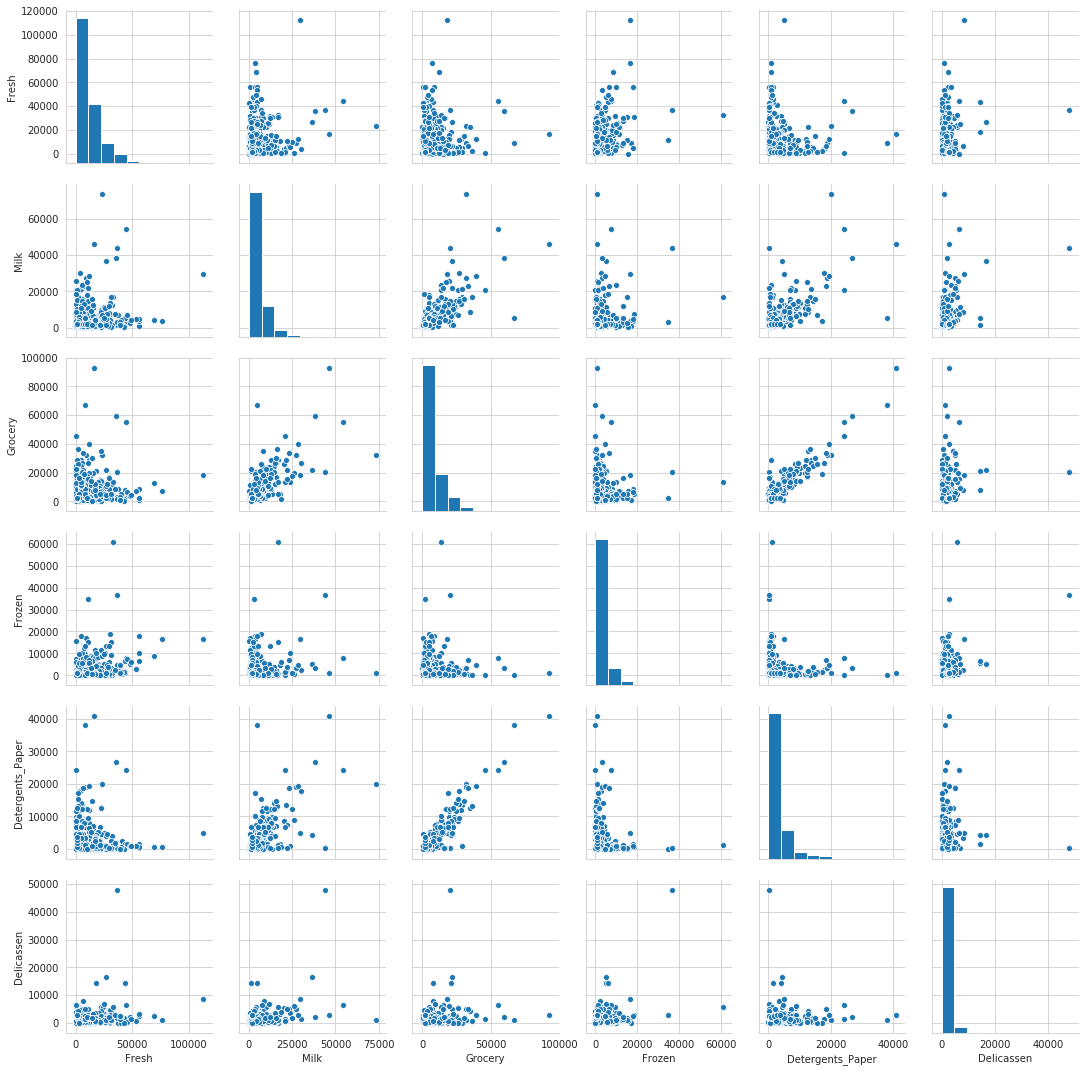

In [6]:
# 1.ii CALCULATE THE COVARIANCE MATRIX AND CORRELATION MATRIX OF THE VARIABLES. INTERPRET THE RESULTS.
######################################################################################################

######Plotting Scatter Dagrams to Evaluate the Relationship between Variables#####
sns.set_style('whitegrid');
sns.pairplot(df_newnum)
# plt.title('Figure-3: Scatterplot Matrix')
plt.show()

# O Linear relationship: Milk and Grocery, Milk and Detergents_Paper, Grocery and Detergents_Paper,

# O Monotonic relationship: None

# O Non-linear relationship: Fresh and Milk, Fresh and Grocery, Fresh and Frozen, Fresh and Detergents_Paper,
# Fresh and Delicassen, Milk and Frozen, Milk and Delicassen, Grocery and Frozen, Grocery and Delicassen,
# Frozen and Detergents_Paper, Frozen and Delicassen, Detergents_Paper and Delicassen

In [7]:
# Correlation matrix has been computed for the numeric variables. Channel and Region are nominal variables and hence,
# their correlation cannot be computed.

#####Correlation Matrix for Numeric Variables with Linear Relationship#####
df_newnum.drop(["Fresh","Frozen", "Delicassen"], axis=1).corr()

# O Strong positive correlation exists between Grocery and Detergents_Paper as indicated by pearson's r of 0.92 which 
# means that if annual spending on Grocery products increases, then it will also increase on Detergents_Paper products and vice versa.

# O Pearson's r of 0.73 shows a moderate positive correlation between Milk and Grocery.

# O Milk and Detergents_Paper also have a moderate positive correlation between them with Pearson's r of 0.66.

,Milk,Grocery,Detergents_Paper
Milk,1.000000,0.729554,0.661894
Grocery,0.729554,1.000000,0.923474
Detergents_Paper,0.661894,0.923474,1.000000


In [8]:
#####Correlation Test (Spearman's r)#####

# Calculating Spearman's r because assumptions for Pearson's r have not been met.

# Spearman's r for Fresh and Milk
coef, p = sc.spearmanr(df_new.Fresh, df_new.Milk)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)   

# O Fresh and Milk are not correlated (p > alpha).

Spearmans correlation coefficient: -0.080
Samples are not correlated (fail to reject H0) p=0.092


In [9]:
# Spearman's r for Fresh and Grocery
coef, p = sc.spearmanr(df_new.Fresh, df_new.Grocery)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Fresh and Grocery are correlated. They have very weak negative relationship as shown by r of -0.11.

Spearmans correlation coefficient: -0.114
Samples are correlated (reject H0) p=0.016


In [10]:
# Spearman's r for Fresh and Frozen
coef, p = sc.spearmanr(df_new.Fresh, df_new.Frozen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Fresh and Frozen are correlated. They have weak positive relationship (r = 0.39).

Spearmans correlation coefficient: 0.386
Samples are correlated (reject H0) p=0.000


In [11]:
# Spearman's r for Fresh and Detergents_Paper
coef, p = sc.spearmanr(df_new.Fresh, df_new.Detergents_Paper)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Fresh and Detergents_Paper are correlated. They have weak negative relationship (r = 0.21).

Spearmans correlation coefficient: -0.206
Samples are correlated (reject H0) p=0.000


In [12]:
# Spearman's r for Fresh and Delicassen
coef, p = sc.spearmanr(df_new.Fresh, df_new.Delicassen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Fresh and Delicassen have a weak positive relationship (r = 0.23).

Spearmans correlation coefficient: 0.225
Samples are correlated (reject H0) p=0.000


In [13]:
# Spearman's r for Milk and Frozen
coef, p = sc.spearmanr(df_new.Milk, df_new.Frozen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Milk and Frozen are not correlated (p > alpha).

Spearmans correlation coefficient: -0.090
Samples are not correlated (fail to reject H0) p=0.057


In [14]:
# Spearman's r for Milk and Delicassen
coef, p = sc.spearmanr(df_new.Milk, df_new.Delicassen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Milk and Delicassen have a weak positive correlation (r = 0.36)

Spearmans correlation coefficient: 0.359
Samples are correlated (reject H0) p=0.000


In [15]:
# Spearman's r for Grocery and Frozen
coef, p = sc.spearmanr(df_new.Grocery, df_new.Frozen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Grocery and Frozen have a very weak negative correlation (r = -0.162)

Spearmans correlation coefficient: -0.162
Samples are correlated (reject H0) p=0.001


In [16]:
# Spearman's r for Grocery and Delicassen
coef, p = sc.spearmanr(df_new.Grocery, df_new.Delicassen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Grocery and Delicassen have a weak positive correlation (r= 0.28).

Spearmans correlation coefficient: 0.282
Samples are correlated (reject H0) p=0.000


In [17]:
# Spearman's r for Frozen and Detergents_Paper
coef, p = sc.spearmanr(df_new.Frozen, df_new.Detergents_Paper)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Frozen and Detergents_Paper have a weak neagative correlation (r= 0.21).

Spearmans correlation coefficient: -0.212
Samples are correlated (reject H0) p=0.000


In [18]:
# Spearman's r for Frozen and Delicassen
coef, p = sc.spearmanr(df_new.Frozen, df_new.Delicassen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Frozen and Delicassen have a weak positive correlation (r= 0.23).

Spearmans correlation coefficient: 0.226
Samples are correlated (reject H0) p=0.000


In [19]:
# Spearman's r for Detergents_Paper and Delicassen
coef, p = sc.spearmanr(df_new.Detergents_Paper, df_new.Delicassen)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are not correlated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  

# O Detergents_Paper and Delicassen have a very weak positive correlation (r= 0.18).

Spearmans correlation coefficient: 0.184
Samples are correlated (reject H0) p=0.000


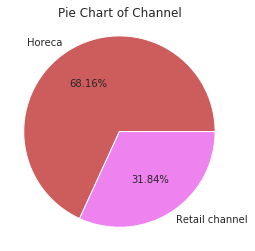

In [20]:
# 1.iii GRAPHICALLY EXAMINE AND INPRET REGION-WISE AND CHANNEL-WISE CUSTOMERS DISTRIBUTION
##########################################################################################

# As Channel and Region are nominal variables, we can use pie chart or bar diagram to represent
# them graphically.


#####Pie Chart of Channel#####

# frequency of channel
# df_new["Channel"].value_counts().sort_index()

channel_fre = [304, 142]
labels = ['Horeca', 'Retail channel']
colors = ['indianred', 'violet']

plt.pie(channel_fre,labels=labels, colors=colors, autopct='%.2f%%', radius = 1.1)
plt.title('Pie Chart of Channel')
plt.show()

# O Approaximately 68% of the customers represent Hotel/Restaurant/Cafe. 
# O 32% (approax.) of the customers represents Retail channel.

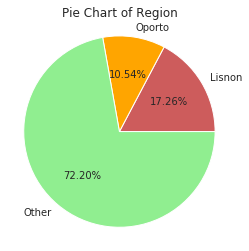

In [21]:
#####Pie Chart of Region#####

# frequency of region
# df_new["Region"].value_counts().sort_index()

channel_fre = [77, 47, 322]
labels = ['Lisnon', 'Oporto', 'Other']
colors = ['indianred', 'orange', 'lightgreen']

plt.pie(channel_fre,labels=labels, colors=colors, autopct='%.2f%%', radius = 1.1)
plt.title('Pie Chart of Region')
plt.show()

# O Most customers belong to 'Other' region (72% approax.). Approaximately 17% are from Lisnon and 11% from Oporto.

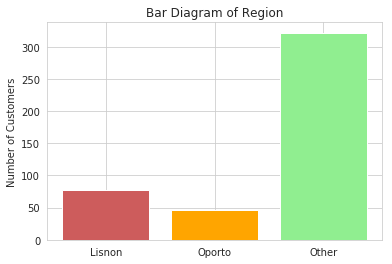

In [22]:
#####Bar diagram of Region#####
objects = ('Lisnon', 'Oporto', 'Other')
color = ['indianred', 'orange', 'lightgreen']
x_pos = np.arange(len(objects))
quality_fre = [77, 47, 322]

plt.bar(x_pos, quality_fre, color=color)
plt.xticks(x_pos, objects)
plt.ylabel('Number of Customers')
plt.title('Bar Diagram of Region')
plt.show()


In [23]:
###################################################################################################################

In [24]:
# 2 USE THE UNSUPERVISED LEARNING METHOD - FOR CLUSTERING CUSTOMERS INTO DIFFERENT GROUPS
#########################################################################################
np.mod(16, 4)

# np.mod(16, 4) = 0, therefore I will use Single linkage method

0

In [25]:
#####Clustering#####

# Clustering data with Dendrogram using Single Linkage

# normalizing the data and bringing all the variables to the same scale
from sklearn.preprocessing import normalize
data_scaled = normalize(df_new)

# creating DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=df_new.columns)
data_scaled.head()

# transposing data_scaled for variable-wise clustering
data_scaled=data_scaled.transpose()
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
Channel,0.000112,0.000125,0.000125,0.000065,0.000079,0.000146,0.000136,0.000145,0.000105,0.000083,...,0.000025,0.000050,0.000091,0.000241,0.000025,0.000068,0.000257,0.000225,0.000198,0.000174
Region,0.000168,0.000188,0.000187,0.000194,0.000119,0.000218,0.000204,0.000217,0.000315,0.000125,...,0.000076,0.000075,0.000273,0.000724,0.000076,0.000203,0.000770,0.000674,0.000595,0.000521
Fresh,0.708333,0.442198,0.396552,0.856837,0.895416,0.684944,0.824476,0.548036,0.625457,0.250143,...,0.990872,0.364462,0.937737,0.672296,0.990872,0.984610,0.260743,0.232733,0.209454,0.187015
Milk,0.539874,0.614704,0.549792,0.077254,0.214203,0.600972,0.217508,0.358368,0.382637,0.462010,...,0.036146,0.388465,0.180530,0.409601,0.036146,0.104891,0.517380,0.455133,0.403834,0.355606
Grocery,0.422741,0.599540,0.479632,0.272650,0.284997,0.372997,0.474247,0.681593,0.649477,0.786371,...,0.019298,0.758545,0.203404,0.605476,0.019298,0.023241,0.517380,0.464119,0.409785,0.359082


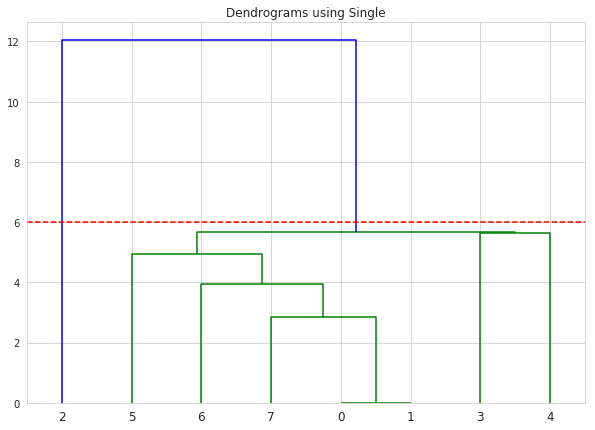

In [26]:
# plotting dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms using Single")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

# the blue line at x = 2 is the vertical line with the maximum distance. Hence, setting a threshold at the midpoint of the blue line (y = 6).
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

# O the threshold intersects two vertical lines. Thus, our number of clusters is 2.

In [27]:
# Hierarchical Agglomerative Clustering with Single Linkage for 2 Clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(data_scaled)

# Creating a new variable 'GROUP' in the data frame
data_scaled['GROUP']=cluster.fit_predict(data_scaled)
data_scaled['GROUP']



Channel             0
Region              0
Fresh               1
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Name: GROUP, dtype: int64

In [28]:
#####Exploring the features of the different groups#####

# O Features in Group-1: Fresh
# O Feature in Group-0: Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen


In [29]:
##################################################################################################################

In [30]:
# 3. Categorize different customer’s types (Potential > 33000, Average <=33000) 
##############################################################################

# creating Total_Consumption by summing all Annual spending variables
df_new['Total_Consumption'] = df_new[list(df.columns[[2,3,4,5,6,7]])].sum(axis=1)

df_new.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Consumption
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [31]:
# grouping customers with Total_Consumption > 33,000 as Customer_Type 1 and Total_Consumption <= 33,000 as Customer_Type 0
df_new['Customer_Type']=np.where(df_new['Total_Consumption']<=33000, '0', '1')
df_new.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Consumption,Customer_Type
0,2,3,12669,9656,7561,214,2674,1338,34112,1
1,2,3,7057,9810,9568,1762,3293,1776,33266,1
2,2,3,6353,8808,7684,2405,3516,7844,36610,1
3,1,3,13265,1196,4221,6404,507,1788,27381,0
4,2,3,22615,5410,7198,3915,1777,5185,46100,1


In [32]:
# 3.i Run the Logistic Regression, Decision Trees, Random Forest, and Support Vector  Machines to classify the different categories of customers
#################################################################################################################################################

# Classifying the Different Categories of Customers Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
cols = ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper', 'Delicassen']
X = df_new[cols]
y = df_new['Customer_Type']
logmodel = LogisticRegression()
logmodel.fit(X, y)
print('Coefficients:', logmodel.coef_)
print('Intercept:', logmodel.intercept_)

Coefficients: [[-1.51385006e+00 -1.05652097e+00  2.01508240e-04  2.48788122e-04
   2.23217578e-04  1.88344138e-04  3.54990317e-04  3.46784417e-04]]
Intercept: [-2.79984773]


/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# Classifying the Different Categories of Customers Using Decision Trees, Random Forest & Support Vector Machines

# Splitting data
cols = ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper', 'Delicassen']
X = df_new[cols]
y = df_new['Customer_Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.3)


In [34]:
# DT
from sklearn import tree
DTclf=tree.DecisionTreeClassifier()

DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        85
           1       0.86      0.78      0.82        49

   micro avg       0.87      0.87      0.87       134
   macro avg       0.87      0.85      0.86       134
weighted avg       0.87      0.87      0.87       134



In [35]:
# RF
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=11)

RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        85
           1       0.93      0.84      0.88        49

   micro avg       0.92      0.92      0.92       134
   macro avg       0.92      0.90      0.91       134
weighted avg       0.92      0.92      0.92       134



In [36]:
# SVC
from sklearn.svm import SVC
SVclf = SVC(kernel='poly', degree=4)
#### kernel='linear', Gaussian kernel: kernel = 'rbf', kernel='sigmoid'

SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.96      0.94      0.95        49

   micro avg       0.96      0.96      0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
# 3.ii Use K-fold Cross-Validation (k=5) to find the best technique among them
###############################################################################
cols = ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper', 'Delicassen']
X = df_new[cols]
y = df_new['Customer_Type']

DTscores = []
RFscores = []
SVscores = []
LRscores = []

####################Logistic Regression##################
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

############### DT ###########################################
from sklearn import tree
DTclf=tree.DecisionTreeClassifier()

############### RF ############################################
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=11)

######################### SVM ##################################
from sklearn.svm import SVC
SVclf = SVC(kernel='poly', degree=4)


from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index, "\n")

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    ############# For LR ##################
    logmodel.fit(X, y)
    LRscores.append(logmodel.score(X_test, y_test))
    ############# for DT #################
    DTclf.fit(X_train, y_train)
    DTscores.append(DTclf.score(X_test, y_test))
    ############# for RF #################
    RFclf.fit(X_train, y_train)
    RFscores.append(RFclf.score(X_test, y_test))
    ############# For SVM #################
    SVclf.fit(X_train, y_train)
    SVscores.append(SVclf.score(X_test, y_test))
    
print('LRscores:', np.mean(LRscores))
print('DTscores:', np.mean(DTscores))
print('RFscores:', np.mean(RFscores))
print('SVscores:', np.mean(SVscores))

# O The best technique among the four techniques using K-fold Corss-Validation (k=5) is Support Vector Machines as 
# it has the highest score of 0.98.

Train Index:  [  0   1   2   3   7   8   9  10  11  12  13  14  15  16  19  20  21  22
  23  24  25  26  27  28  30  32  33  34  35  36  37  38  39  41  42  43
  44  45  46  48  49  50  51  52  53  54  55  56  57  59  60  61  63  64
  66  68  69  70  71  72  73  74  75  76  77  79  80  81  82  83  84  85
  86  87  88  89  91  92  93  94  95  96  97  98  99 100 103 104 105 106
 108 109 110 111 112 113 114 115 116 118 120 121 123 124 125 126 127 129
 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 163 164 165 166 167 169
 170 171 172 175 176 177 178 179 181 182 183 184 185 188 189 190 191 193
 194 195 196 197 198 199 200 202 203 204 205 206 208 209 210 211 212 213
 215 216 217 218 219 220 222 226 227 229 230 231 233 234 235 237 238 239
 240 241 242 243 244 245 247 248 249 251 252 253 254 255 256 258 259 262
 263 264 265 266 268 269 271 272 273 275 276 277 278 279 280 281 282 283
 285 287 288 290 291 293 294 297 298 

/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  15  16  17  18  19  20  21
  22  24  25  26  28  29  30  31  32  33  34  35  36  37  38  40  42  43
  44  45  47  48  49  50  51  52  53  54  55  56  57  58  60  62  63  64
  65  67  68  70  71  72  74  75  76  77  78  79  83  84  86  87  90  94
  96  97  99 100 101 102 103 104 105 107 108 109 110 111 112 113 114 115
 116 117 118 119 121 122 126 128 129 130 133 134 135 136 137 138 139 140
 141 142 143 144 145 147 148 149 150 151 152 153 154 155 156 158 160 161
 162 163 166 167 168 169 170 173 174 175 176 177 178 180 181 182 183 184
 186 187 188 190 192 193 194 195 196 198 199 200 201 202 203 205 206 207
 209 210 211 212 214 215 216 217 219 220 221 222 223 224 225 226 227 228
 229 231 232 233 234 235 236 237 238 239 240 241 243 244 245 246 247 248
 249 250 252 253 254 255 257 259 260 261 262 263 264 265 266 267 269 270
 271 273 274 275 276 278 279 280 281 282 283 284 286 288 289 290 292 294
 295 296 297 299 300 301 302 303 305 

/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

[  0   1   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  22  23  25  26  27  28  29  30  31  32  33  34  37  38  39  40  41  42
  43  44  46  47  48  49  50  51  53  55  58  59  61  62  64  65  66  67
  68  69  70  71  72  73  76  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  98  99 100 101 102 104 105 106 107 108 109 110
 111 112 113 115 117 119 120 121 122 123 124 125 126 127 128 129 131 132
 133 135 136 138 139 141 142 143 144 145 146 147 150 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 171 172 173 174 175 178
 179 180 185 186 187 188 189 191 192 195 196 197 201 203 204 206 207 208
 209 211 213 214 215 216 218 221 222 223 224 225 226 227 228 229 230 232
 233 235 236 237 238 239 241 242 244 245 246 247 249 250 251 252 254 255
 256 257 258 260 261 264 265 266 267 268 270 271 272 274 275 276 277 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 295 296 297 298
 299 300 303 304 305 306 307 308 309 310 311 312 31

/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
# 3.iii Find the confusion matrix and ROC curve for the best method. Hence, calculate and
# interpret: Predictive value positive and negative, Accuracy, Sensitivity, and Specificity of the test.

#####Confusion matrix for Support Vector Machines#####
from sklearn.svm import SVC
SVclf = SVC(kernel='poly', degree=4)
### kernel='linear', Gaussian kernel: kernel = 'rbf', kernel='sigmoid'

SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

#####Calculating Predictive value positive and negative, Accuracy, Sensitivity, and
# Specificity of the test#####

# confusion matrix of SVM
cm = confusion_matrix(y_test, y_pred)

# calculating sensitivity from confusion matrix
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

# calculating specificity from confusion matrix
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# calculating predictive value positive confusion matrix
predictive_value_posive = cm[0,0]/(cm[0,0]+cm[1,0])
print('Predictive value positive : ', predictive_value_posive)

# calculating predictive value negative from confusion matrix
predictive_value_negative = cm[1,1]/(cm[1,1]+cm[0,1])
print('Predictive value negative : ', predictive_value_negative)

# O Sensitivity: For all instances that were actually positive, 96.4% percent was classified correctly.
# O Specificity: For all instances that were actually negative, 98.5% percent was classified correctly.
# O Predictive value positive: For all instances classified positive, 99.1% was correct.
# O Predictive value negative: For all instances classified negative, 94.4% was correct.


Confusion Matrix:
 [[48  1]
 [ 2 38]]
Accuracy Score: 0.9662921348314607
Sensitivity :  0.9795918367346939
Specificity :  0.95
Predictive value positive :  0.96
Predictive value negative :  0.9743589743589743


/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/home/abeid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC: 0.9988076311605724


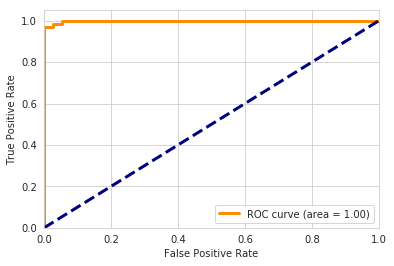

In [39]:
#####ROC CURVE#####

# Split the data into train and test sub-datasets
cols = ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper', 'Delicassen']
X = df_new[cols]
y = df_new['Customer_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

# fit SVM model on the train data
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=4)
model.fit(X_train, y_train)

# predict probabilities for the test data
probs = model.decision_function(X_test)

# compute the AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC:', auc)

# get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label='1')

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc="lower right")
# plt.title('Receiver operating characteristic example')
# show the plot
plt.show()
